# Лабораторная работа 4. Недообучение и эффект "катастрофического забывания"

In [ ]:
import torch
from torch import nn

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

Сгенерируйте данные для первого задания:

In [2]:
# Генерация данных
X, y = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


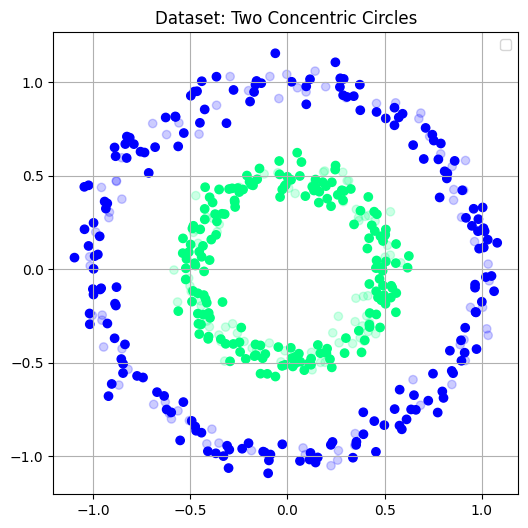

In [3]:
# Визуализация данных
plt.figure(figsize=(6,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="winter", alpha=1.0)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="winter", alpha=0.2)
plt.title("Dataset: Two Concentric Circles")
plt.legend()
plt.grid(True)

### Задание 1.1
Обучите на `100` эпохах **линейную** модель нейронной сети, заданную классом `LinearModel`, задаче классификации точек сгенерированного датасета. Используйте оптимизатор `optim.Adam` с `lr=0.01` и функцию потерь `nn.BCELoss()`. В процессе обучения постройте графики значений функции потерь на обучающей и валидационной подвыборках.

In [ ]:
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

### Задание 1.2
Обучите на `100` эпохах **НЕлинейную** модель нейронной сети, заданную классом `NonLinearModel`, задаче классификации точек сгенерированного датасета. Используйте оптимизатор `optim.Adam` с `lr=0.01` и функцию потерь `nn.BCELoss()`. В процессе обучения постройте графики значений функции потерь на обучающей и валидационной подвыборках.

In [ ]:
class NonLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

### Задание 1.3
Напишите функцию `plot_decision_boundary()` для визуализации границы, показывающей как модель разделяет классы в пространстве признаков.

Для этого внутри функции создается сетка (mershfrid) значений по осям X и Y, затем каждая точка этой сетки передается в модель и вычисляется для неё предсказание (класс), а затем всё пространство окрашивается цветом класса.
Пример, создания mershfrid:
```
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

```

Затем получите диаграммы предсказаний для каждой из обученной модели и сделайте выводы. Закрашивание областей сетки можно сделать, например, следующим образом (где `Z` - предсказанные классы):
```
ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.4)
```

В результате должны получиться примерно диаграммы как в файле `2025_NN_lab4.png` для линейной и нелинейной моделей соответственно.

### Задание 2
Используя известный датасет `Iris`, исследуйте эффект катастрофического забывания нейронной сети.

Для этого выполните:
1. Разбейте датасет на сбалансированные обучающую и валидационную подвыборки. Визуализируйте состав датасета относительно количества примеров в классах.
1. Создайте модель нейронной сети из трёх линейных слоёв и функций активации `nn.ReLu()`. Продумайте выход сети, чтобы для него подходила используемая вами функция потерь.
1. Обучите модель классификации на два из трёх классов: `setosa` и `versicolor`. Оцените точность классификации обученной модели.
1. Продолжите обучать модель классификации на два класса из трёх (но уже добавим новый класс): `versicolor` и `virginica`. Оцените точность дообученной модели.
1. Проверьте точность классификации дообученой модели на "старой" задаче из пункта 3. Сделайте выводы.